<a href="https://colab.research.google.com/github/tylereriksen/PersonalProjects/blob/main/Linear_Regression_Experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook will attempt to implement it's own algorithm to SKLearn's Linear Regression Model. It will do so on solar data of Solar System objects in showing Kepler's Third Law. We will show at the end the coefficients resulting from the algorithm here will be close to (insignificant difference in values) with the ones generated by the SKLearn's Linear Regression Model.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle

Make the data set of the planetary values for distance from sun and orbital duration

In [2]:
d = {'Planet/Dwarf Planet/Object':['Mercury', 'Venus', 'Earth', 'Mars', 'Vesta', 'Ceres', 'Pallas', 'Hygiea', 'Jupiter', 'Saturn', 'Halley\'s Comet', 'Uranus', 'Neptune', 'Orcus', 'Pluto', 'Haumea', 'Quaoar', 'Makemake', 'Eris', 'Sedna'], 
     'Average Distance From Sun (Millions of Miles)':[35.98, 67.237, 92.955, 141.635, 219.542, 257.342, 257.49, 292.021, 483.723, 890.758, 1657.774, 1783.393, 2795.18, 3641.451, 3670.05, 4007.883, 4061.633, 4222.98, 6308.35, 47040], 
     'Orbital Revolution Duration (Earth years)':[0.241, 0.616, 1, 1.881, 3.63, 4.6051, 4.613, 5.57, 11.862, 29.4571, 75.32, 84.0205, 164.8, 245.19, 247.94, 283.12, 288.83, 306.21, 559.07, 11390]}

df = pd.DataFrame(data = d)
df

,Planet/Dwarf Planet/Object,Average Distance From Sun (Millions of Miles),Orbital Revolution Duration (Earth years)
0,Mercury,35.980,0.2410
1,Venus,67.237,0.6160
2,Earth,92.955,1.0000
3,Mars,141.635,1.8810
4,Vesta,219.542,3.6300
5,Ceres,257.342,4.6051
6,Pallas,257.490,4.6130
7,Hygiea,292.021,5.5700
8,Jupiter,483.723,11.8620
9,Saturn,890.758,29.4571


We will now transform the data into the proper form we want to do our linear regression. After doing so, we will split our data set into two parts: one for training our linear regression model and the other for testing how well suited and accurate the model is.

In [3]:
# list of the planet's distances from sun cubed divided by 100000 for easier representation and comparison with the Y-set
X = [(1/100000) * x ** 3 for x in list(df['Average Distance From Sun (Millions of Miles)'])]
# list of the planet's orbital years squared
Y = [y ** 2 for y in list(df['Orbital Revolution Duration (Earth years)'])]

dp = pd.DataFrame(data = {'Planet': ['Mercury', 'Venus', 'Earth', 'Mars', 'Vesta', 'Ceres', 'Pallas', 'Hygiea', 'Jupiter', 'Saturn', 'Halley\'s Comet', 'Uranus', 'Neptune', 'Orcus', 'Pluto', 'Haumea', 'Quaoar', 'Makemake', 'Eris', 'Sedna'], 
                          'Cube': X,
                          'Square': Y})
print(dp)

# organize the data into the parts of covariates (inputs) and predicitions (output)
predict = 'Square'
dp = dp[['Cube', 'Square']]
X = np.array(dp.drop([predict], 1))
y = np.array(dp[predict])

# split the data into the test and train sets
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.2)
print(x_train, y_train)
print(x_test, y_test)

            Planet          Cube        Square
0          Mercury  4.657828e-01  5.808100e-02
1            Venus  3.039660e+00  3.794560e-01
2            Earth  8.031899e+00  1.000000e+00
3             Mars  2.841265e+01  3.538161e+00
4            Vesta  1.058164e+02  1.317690e+01
5            Ceres  1.704245e+02  2.120695e+01
6           Pallas  1.707187e+02  2.127977e+01
7           Hygiea  2.490246e+02  3.102490e+01
8          Jupiter  1.131853e+03  1.407070e+02
9           Saturn  7.067718e+03  8.677207e+02
10  Halley's Comet  4.555919e+04  5.673102e+03
11          Uranus  5.672065e+04  7.059444e+03
12         Neptune  2.183883e+05  2.715904e+04
13           Orcus  4.828624e+05  6.011814e+04
14           Pluto  4.943288e+05  6.147424e+04
15          Haumea  6.437913e+05  8.015693e+04
16          Quaoar  6.700420e+05  8.342277e+04
17        Makemake  7.531077e+05  9.376456e+04
18            Eris  2.510426e+06  3.125593e+05
19           Sedna  1.040883e+09  1.297321e+08
[[6.70042016e

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


Graph of the above data to show that a trend can be generally seen and that a linear regression would suffice for this.

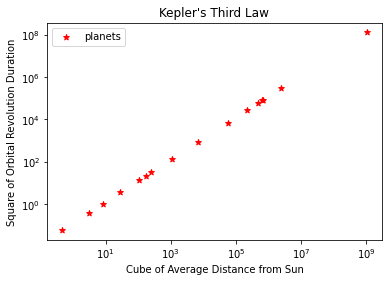

In [4]:
plt.scatter(x_train, y_train, label= "planets", color= "red",
            marker= "*")
plt.xscale("log")
plt.xlabel('Cube of Average Distance from Sun')
plt.yscale("log")
plt.ylabel('Square of Orbital Revolution Duration')
plt.title('Kepler\'s Third Law')
plt.legend()
plt.show()

We can calculate the slope of the linear regression line by calculating the following sums: $m = \frac{\sum (x-x_i)(y-y_i)}{\sum (x-x_i)^2}$. $x_i$ is equal to the average of the $x$ values and $y_i$ is equal to the average of the $y$ values. We can then use this to find our y-intercept and get the equation for our linear regression line as $y = mx + b$.

In [5]:
# finding the averages of the X and Y
xi = sum(x_train) / len(x_train)
yi = sum(y_train) / len(y_train)

# table and data for the datatable for calculations
xData = {'x': [i for i in x_train],
         'y': [i for i in y_train],
         'x-xi': [i - xi for i in x_train],
         'y-yi': [i - yi for i in y_train],
         '(x-xi)^2': [(i - xi) ** 2 for i in x_train],
         '(x-xi)(y-yi)': [(x_train[i] - xi) * (y_train[i] - yi) for i in range(len(x_train))]}
yData = pd.DataFrame(data = xData)
print(yData)

# finding the slope and intercept based on the calculations
slope = float(sum(yData[yData.columns[-1]]) / sum(yData[yData.columns[-2]]))
# returns a np array so get the value in the array
intercept = (yi - slope * xi)[0]
print("From this data, we can conclude that the slope is %f and the intercept is %f" %(slope, intercept))

                       x             y                   x-xi          y-yi  \
0    [670042.0164102672]  8.342277e+04  [-64672802.861086376] -8.060640e+06   
1   [28.412651252228745]  3.538161e+00   [-65342816.46484539] -8.144060e+06   
2    [2510425.528374329]  3.125593e+05  [-62832419.349122316] -7.831504e+06   
3    [643791.3019013093]  8.015693e+04  [-64699053.575595334] -8.063906e+06   
4    [249.0246001832527]  3.102490e+01   [-65342595.85289646] -8.144032e+06   
5    [7067.717699213997]  8.677207e+02   [-65335777.15979743] -8.143195e+06   
6   [0.4657828319199999]  5.808100e-02  [-65342844.411713816] -8.144063e+06   
7    [218388.2864017983]  2.715904e+04  [-65124456.591094844] -8.116904e+06   
8   [494328.83362525137]  6.147424e+04  [-64848516.043871395] -8.082589e+06   
9   [3.0396598228105294]  3.794560e-01  [-65342841.837836824] -8.144063e+06   
10    [8.03189949883875]  1.000000e+00   [-65342836.84559715] -8.144062e+06   
11  [170.42449493245684]  2.120695e+01  [-65342674.4

We will graph our linear regression equation with the graph in order to see how well the data points fit with it graphically/visually.

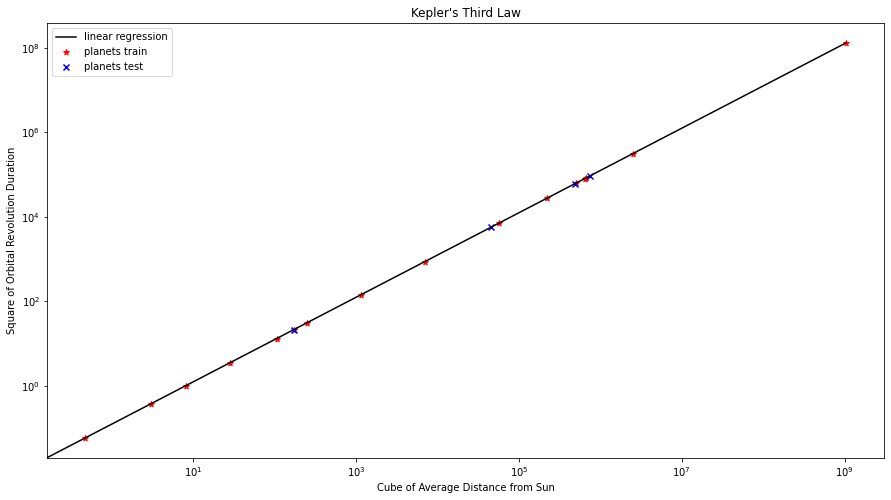

In [6]:
# graph of the data points along with the linear regression line
plt.figure(figsize = (15, 8))
plt.scatter(x_train, y_train, label= "planets train", color= "red",
            marker= "*")
plt.scatter(x_test, y_test, label= "planets test", color= "blue",
            marker= "x")
a = np.linspace(0, max(np.concatenate((x_train, x_test), axis = 0)))
plt.plot(a, a * slope + intercept, label = "linear regression", color = "black")
plt.xscale("log")
plt.xlabel('Cube of Average Distance from Sun')
plt.yscale("log")
plt.ylabel('Square of Orbital Revolution Duration')
plt.title('Kepler\'s Third Law')
plt.legend()
plt.show()

This part will print out the expected values for all the test data points and compare it with the predicted values from the linear regression.

In [7]:
for idx, celestials in enumerate(x_test):
  print("The predicted value was %f and the actual value was %f" %(celestials * slope + intercept, y_test[idx]))
  # print("The error is %f percent" %(abs((celestials * slope + intercept - y_test[idx]) / y_test[idx]) * 100))
  print()

The predicted value was 5630.079423 and the actual value was 5673.102400

The predicted value was 93816.532445 and the actual value was 93764.564100

The predicted value was -26.986003 and the actual value was 21.279769

The predicted value was 60134.077469 and the actual value was 60118.136100



Now we will try to find the coefficient of determination of this set, $R^2$. This can be found by finding the residual sum of squares and total sum of squares. The residual sum is the square of the difference between the predicted value from the linear regression model with the actual value. The total sum of squares is square of the differences between the actual value with the mean of the actual values.

In [8]:
# find the residual sum of squares
u = 0
for idx in range(len(x_test)):
  u += (y_test[idx] - (x_test[idx] * slope + intercept)) ** 2
# return an np array so get the value in the array
u = u[0]

# find the total sum of squares
v = 0
yavg = sum(y_test) / len(y_test)
for idx in range(len(y_test)):
  v += (y_test[idx] - yavg) ** 2

# find the value of R^2 based on the above values
accuracy = 1 - u / v
print(accuracy)

0.9999988248603564


Let's compare the above values--the slope, the intercept, and the $R^2$ coefficient of determination--with the values that we will get in sklearn package linear regression.

In [9]:
# my algorithm's coefficient output + accuracy
print('My Slope Coefficient: \n', slope)
print('My Intercept: \n', intercept)
print('My Accuracy: \n', accuracy, '\n\n')

# SKLearn Model's coefficient output + accuracy
linear = linear_model.LinearRegression()
linear.fit(x_train, y_train)
acc = linear.score(x_test, y_test)
print('SKLearn Slope Coefficient: \n', linear.coef_[0]) # there is only one covariate
print('SKLearn Intercept: \n', linear.intercept_)
print('SKLearn Accruacy: \n', acc)

My Slope Coefficient: 
 0.12463662143654267
My Intercept: 
 -48.26380523853004
My Accuracy: 
 0.9999988248603564 


SKLearn Slope Coefficient: 
 0.12463662143654274
SKLearn Intercept: 
 -48.26380524318665
SKLearn Accruacy: 
 0.9999988248603563
